In [ ]:
from googletrans import Translator
translator = Translator()
import pandas as pd
import numpy as np
import sys
import datetime
from copy import deepcopy
sys.path.append('/Users/pabloherrero/Documents/ManHatTan/')
from ML.duolingo_hlr import *
sys.path.append('/Users/pabloherrero/Documents/ManHatTan/python_scripts/')

from updatePerformance import *

# Test software with learning progress file 

In [3]:
db = '../ML/learning_traces.13m.csv'

df = pd.read_csv(db, nrows=3000)
df

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.000000,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.500000,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.000000,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.500000,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.000000,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1
5,1.000000,1362076081,27649635,u:FO,de,en,56429751fdaedb6e491f4795c770f5a4,der/der<det><def><m><sg><nom>,4,3,1,1
6,1.000000,1362076081,27649635,u:FO,de,en,1bacf218eaaf9f944e525f7be9b31899,kind/kind<n><nt><sg><nom>,4,4,1,1
7,1.000000,1362082032,444407,u:dDwF,es,en,73eecb492ca758ddab5371cf7b5cca32,bajo/bajo<pr>,3,3,1,1
8,1.000000,1362082044,5963,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,8,6,6,6
9,0.750000,1362082044,5963,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,6,5,4,3


## Test including lexeme info

In [7]:
db = '../ML/learning_traces.13m.csv'

trainset, testset = read_data(db, method='hlr', max_lines=300)

reading data...0...done!


In [8]:
model = SpacedRepetitionModel(method='hlr', omit_h_term=False, )
model.train(trainset)

In [10]:
model.eval(testset, 'test')

test	3207.9 (p=7.2, h=3200.7, l2=0.0)	mae(p)=0.293	cor(p)=-0.216	mae(h)=58.138	cor(h)=-0.343


In [8]:
filebits = 'hlr_hterm_lexemes_300'
filebase = '.'.join(filebits)
if not os.path.exists('results/'):
    os.makedirs('results/')
model.dump_weights('results/'+filebase+'.weights')
model.dump_predictions('results/'+filebase+'.preds', testset)

## Test omitting lexeme info

In [11]:
db = '../ML/learning_traces.13m.csv'

trainset, testset = read_data(db, method='hlr', omit_lexemes=True, max_lines=300)

reading data...0...done!


In [14]:
model = SpacedRepetitionModel(method='hlr', omit_h_term=False, )
model.train(trainset)

In [15]:
model.eval(testset, 'test')

test	3206.3 (p=7.2, h=3199.1, l2=0.0)	mae(p)=0.293	cor(p)=-0.216	mae(h)=58.116	cor(h)=-0.341


##### So very similar results are obtained, we can start working without the lexeme

In [13]:
db = '../ML/learning_traces.13m.csv'
f=open(db, 'rt')
reader = csv.DictReader(f)
max_lines=30
for i, row in enumerate(reader):
    if max_lines is not None and i >= max_lines:
        break
    print(i, row)

0 OrderedDict([('p_recall', '1.0'), ('timestamp', '1362076081'), ('delta', '27649635'), ('user_id', 'u:FO'), ('learning_language', 'de'), ('ui_language', 'en'), ('lexeme_id', '76390c1350a8dac31186187e2fe1e178'), ('lexeme_string', 'lernt/lernen<vblex><pri><p3><sg>'), ('history_seen', '6'), ('history_correct', '4'), ('session_seen', '2'), ('session_correct', '2')])
1 OrderedDict([('p_recall', '0.5'), ('timestamp', '1362076081'), ('delta', '27649635'), ('user_id', 'u:FO'), ('learning_language', 'de'), ('ui_language', 'en'), ('lexeme_id', '7dfd7086f3671685e2cf1c1da72796d7'), ('lexeme_string', 'die/die<det><def><f><sg><nom>'), ('history_seen', '4'), ('history_correct', '4'), ('session_seen', '2'), ('session_correct', '1')])
2 OrderedDict([('p_recall', '1.0'), ('timestamp', '1362076081'), ('delta', '27649635'), ('user_id', 'u:FO'), ('learning_language', 'de'), ('ui_language', 'en'), ('lexeme_id', '35a54c25a2cda8127343f6a82e6f6b7d'), ('lexeme_string', 'mann/mann<n><m><sg><nom>'), ('history_se

# Test with own adapted GOTA

In [2]:
gota_path = '../GOTAs/Die_Verwandlung.agot'

# trainset, testset = read_data(gota_path, method='hlr', omit_lexemes=True, max_lines=300)

In [3]:
gota = pd.read_csv(gota_path, index_col=0)
gota

,de,en,creation_time,seen_hist,right_hist
0,Ungeziefer,vermin,2020-03-22 17:39:12.011106,0,0.0
1,Versteifungen,stiffeners,2020-03-22 17:39:12.011106,2,2.0
2,Umfang,scope,2020-03-22 17:39:12.011106,3,1.0
3,flimmerten,flickered,2020-03-22 17:39:12.011106,0,0.0
4,versehen,isprovided,2020-03-22 17:39:12.011106,0,0.0
5,Fensterblech,Windowsheet,2020-03-22 17:39:12.011106,0,0.0
6,undurchführbar,impracticable,2020-03-22 17:39:12.011106,1,1.0
7,schaukelte,rocked,2020-03-22 17:39:12.011106,1,1.0
8,Jucken,itching,2020-03-22 17:39:12.011106,0,0.0
9,Pult,panel,2020-03-22 17:39:12.011106,0,0.0


In [3]:
db = '../ML/learning_traces.13m.csv'

df = pd.read_csv(db, nrows=3000)

df

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.000000,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.500000,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.000000,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.500000,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.000000,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1
5,1.000000,1362076081,27649635,u:FO,de,en,56429751fdaedb6e491f4795c770f5a4,der/der<det><def><m><sg><nom>,4,3,1,1
6,1.000000,1362076081,27649635,u:FO,de,en,1bacf218eaaf9f944e525f7be9b31899,kind/kind<n><nt><sg><nom>,4,4,1,1
7,1.000000,1362082032,444407,u:dDwF,es,en,73eecb492ca758ddab5371cf7b5cca32,bajo/bajo<pr>,3,3,1,1
8,1.000000,1362082044,5963,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,8,6,6,6
9,0.750000,1362082044,5963,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,6,5,4,3


In [4]:
df.lexeme_id[0]

NameError: name 'df' is not defined

## Adapt GOTA to Corpus db

##### DAPSTEP
DAtabase w/ Performance and Session TimEstamP

(Provisional name until Lexeme information can be added)

##### LIPSTICK
Lexeme-Identified-, Performance-in-Sessions- & Timestamp- Indexed Corpus Kernel

In [4]:
cols0 = ['lexeme_id', 'translated_word', 'timestamp', 'history_seen', 'history_correct']
# gota.columns = cols0
lear_lang = gota.columns[0]
ui_lang = gota.columns[1]
timest = gota.creation_time.apply(lambda d: datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f')).apply(lambda dt : int(datetime.datetime.timestamp(dt)))

delta = timest - np.min(timest)

In [6]:
int(timest[0])

1584895152

In [166]:
import matplotlib.pyplot as plt 

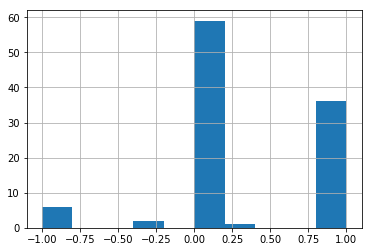

In [169]:
ptruth = ((gota.right_hist ) / gota.seen_hist).fillna(0)
ptruth.hist()

In [18]:
ptruth = ((gota.right_hist ) / gota.seen_hist).fillna(0)
dapstep = pd.DataFrame({'p_recall':ptruth})

dapstep['timestamp'] = timest
dapstep['delta'] = delta
dapstep['user_id'] = 'pablo'
dapstep['learning_language'] = lear_lang
dapstep['ui_language'] = ui_lang
dapstep['lexeme_id'] = gota[lear_lang]
dapstep['word_id'] = gota[ui_lang]
dapstep['lexeme_string'] = 'lernt/lernen<vblex><pri><p3><sg>'  # Just to complete the column
dapstep['history_seen'] = gota['seen_hist']   # Will change this in gotas
dapstep['history_correct'] = gota['right_hist'].apply(lambda r : int(r))
dapstep['session_seen'] = gota['seen_hist']   # Will change this in gotas
dapstep['session_correct'] = gota['right_hist'].apply(lambda r : int(r))
dapstep

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,word_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,0.000000,1584895152,0,pablo,de,en,Ungeziefer,vermin,lernt/lernen<vblex><pri><p3><sg>,0,0,0,0
1,1.000000,1584895152,0,pablo,de,en,Versteifungen,stiffeners,lernt/lernen<vblex><pri><p3><sg>,2,2,2,2
2,0.333333,1584895152,0,pablo,de,en,Umfang,scope,lernt/lernen<vblex><pri><p3><sg>,3,1,3,1
3,0.000000,1584895152,0,pablo,de,en,flimmerten,flickered,lernt/lernen<vblex><pri><p3><sg>,0,0,0,0
4,0.000000,1584895152,0,pablo,de,en,versehen,isprovided,lernt/lernen<vblex><pri><p3><sg>,0,0,0,0
5,0.000000,1584895152,0,pablo,de,en,Fensterblech,Windowsheet,lernt/lernen<vblex><pri><p3><sg>,0,0,0,0
6,1.000000,1584895152,0,pablo,de,en,undurchführbar,impracticable,lernt/lernen<vblex><pri><p3><sg>,1,1,1,1
7,1.000000,1584895152,0,pablo,de,en,schaukelte,rocked,lernt/lernen<vblex><pri><p3><sg>,1,1,1,1
8,0.000000,1584895152,0,pablo,de,en,Jucken,itching,lernt/lernen<vblex><pri><p3><sg>,0,0,0,0
9,0.000000,1584895152,0,pablo,de,en,Pult,panel,lernt/lernen<vblex><pri><p3><sg>,0,0,0,0


In [19]:
dapstep.to_csv('../LIPSTICK/Die_Verwandlung.lip', index=False)

## Test with DAPSTEP

In [ ]:
def read_data(input_file, method, omit_bias=False, omit_lexemes=False, max_lines=None):
    # read learning trace data in specified format, see README for details
    sys.stderr.write('reading data...')
    instances = list()
    if input_file.endswith('gz'):
        f = gzip.open(input_file, 'rb')
    else:
        f = open(input_file, 'r')
    reader = csv.DictReader(f)
    for i, row in enumerate(reader):
        if max_lines is not None and i >= max_lines:
            break
        p = pclip(float(row['p_recall']))
        t = float(row['delta'])/(60*60*24)  # convert time delta to days
        h = hclip(-t/(math.log(p, 2)))
        lang = '%s->%s' % (row['ui_language'], row['learning_language'])
        lexeme_id = row['lexeme_id']
        lexeme_string = row['lexeme_string']
        timestamp = int(row['timestamp'])
        user_id = row['user_id']
        seen = int(row['history_seen'])
        right = int(row['history_correct'])
        wrong = seen - right
        right_this = int(row['session_correct'])
        wrong_this = int(row['session_seen']) - right_this
        # feature vector is a list of (feature, value) tuples
        fv = []
        # core features based on method
        if method == 'leitner':
            fv.append((intern('diff'), right-wrong))
        elif method == 'pimsleur':
            fv.append((intern('total'), right+wrong))
        else:
            # fv.append((intern('right'), right))
            # fv.append((intern('wrong'), wrong))
            fv.append((intern('right'), math.sqrt(1+right)))
            fv.append((intern('wrong'), math.sqrt(1+wrong)))
        # optional flag features
        if method == 'lr':
            fv.append((intern('time'), t))
        if not omit_bias:
            fv.append((intern('bias'), 1.))
        if not omit_lexemes:
            fv.append((intern('%s:%s' % (row['learning_language'], lexeme_string)), 1.))
        instances.append(Instance(p, t, fv, h, (right+2.)/(seen+4.), lang, right_this, wrong_this, timestamp, user_id, lexeme_string))
        if i % 1000000 == 0:
            sys.stderr.write('%d...' % i)
    sys.stderr.write('done!\n')
    splitpoint = int(0.9 * len(instances))
    return instances[:splitpoint], instances[splitpoint:]


In [20]:
lippath = '../LIPSTICK/Die_Verwandlung.lip'

trainset, testset = read_data(lippath, method='hlr', omit_lexemes=False, max_lines=300)

reading data...0...done!


In [7]:
model = SpacedRepetitionModel(method='hlr', omit_h_term=False, )
model.train(trainset)

In [8]:
model.eval(testset, 'test')

test	8.1 (p=8.0, h=0.1, l2=0.0)	mae(p)=0.727	cor(p)=0.000	mae(h)=0.989	cor(h)=0.000


In [9]:
model.eval(trainset, 'test')

test	60.3 (p=59.4, h=0.9, l2=0.0)	mae(p)=0.641	cor(p)=-0.000	mae(h)=0.989	cor(h)=-0.000


In [11]:
inst = trainset[0]
model.train_update(inst)
inst.index

12

## Update LIPSTICK

In [25]:
dapstep['p_pred']= 0

In [22]:
prob = pd.Series({i.index: model.predict(i)[0] for i in trainset})

In [23]:
prob

0     0.9999
1     0.9999
2     0.9999
3     0.9999
4     0.9999
5     0.9999
6     0.9999
7     0.9999
8     0.9999
9     0.9999
10    0.9999
11    0.9999
12    0.9999
13    0.9999
14    0.9999
15    0.9999
16    0.9999
17    0.9999
18    0.9999
19    0.9999
20    0.9999
21    0.9999
22    0.9999
23    0.9999
24    0.9999
25    0.9999
26    0.9999
27    0.9999
28    0.9999
29    0.9999
       ...  
63    0.9999
64    0.9999
65    0.9999
66    0.9999
67    0.9999
68    0.9999
69    0.9999
70    0.9999
71    0.9999
72    0.9999
73    0.9999
74    0.9999
75    0.9999
76    0.9999
77    0.9999
78    0.9999
79    0.9999
80    0.9999
81    0.9999
82    0.9999
83    0.9999
84    0.9999
85    0.9999
86    0.9999
87    0.9999
88    0.9999
89    0.9999
90    0.9999
91    0.9999
92    0.9999
Length: 93, dtype: float64

In [26]:
dapstep.p_pred.update(prob)

dapstep.sort_values('p_pred', inplace=True)

dapstep

In [35]:
dapstep.to_csv('../LIPSTICK/Die_Verwandlung.lip', index=False)

In [183]:
model.weights

defaultdict(float,
            {'right': -0.00020636687266351592,
             'wrong': -0.00022422906136624262,
             'bias': -0.00020238853919890703,
             'de:lernt/lernen<vblex><pri><p3><sg>': -0.00020238853919890703})

In [177]:
fname = '../LIPSTICK/Die_Verwandlung.res'
with open(fname, 'w') as f:
    f.write('p\tpp\th\thh\tlang\tuser_id\ttimestamp\n')
    for inst in trainset:
        pp, hh = model.predict(inst)
#       
        print((inst.p, pp, inst.h, hh, inst.lang, inst.uid, inst.ts))

(0.0001, 0.9999, 0.010416666666666666, 0.9995477771235615, 'en->de', 'pablo', 1584895152)
(0.0001, 0.9999, 0.010416666666666666, 0.9995477771235615, 'en->de', 'pablo', 1584895152)
(0.0001, 0.9999, 0.010416666666666666, 0.9995477771235615, 'en->de', 'pablo', 1584895152)
(0.0001, 0.9999, 0.010416666666666666, 0.9995477771235615, 'en->de', 'pablo', 1584895152)
(0.0001, 0.9999, 0.010416666666666666, 0.9995477771235615, 'en->de', 'pablo', 1584895152)
(0.0001, 0.9999, 0.010416666666666666, 0.9995477771235615, 'en->de', 'pablo', 1584895152)
(0.9999, 0.9999, 0.010416666666666666, 0.9994858272102767, 'en->de', 'pablo', 1584895152)
(0.0001, 0.9999, 0.010416666666666666, 0.9995477771235615, 'en->de', 'pablo', 1584895152)
(0.9999, 0.9999, 0.010416666666666666, 0.9994858272102767, 'en->de', 'pablo', 1584895152)
(0.0001, 0.9999, 0.010416666666666666, 0.9995477771235615, 'en->de', 'pablo', 1584895152)
(0.0001, 0.9999, 0.010416666666666666, 0.9995477771235615, 'en->de', 'pablo', 1584895152)
(0.0001, 0